# Breast Cancer - ML

**Load Data**

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x, y = load_breast_cancer(return_X_y = True)

**Data Shapes**

In [3]:
print("Features {}".format(x.shape))
print("Target {}".format(y.shape))

Features (569, 30)
Target (569,)


**Split data into training and test**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, random_state=1)

**Normalize the data**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Implement Classifier**

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, \
                                    max_depth=4)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.9953051643192489

**Test the Classifier's accuracy**

In [7]:
from sklearn.metrics import accuracy_score
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.951048951048951

**PCA - Principal Component Analysis**
Conversion into 2D

In [8]:
from sklearn.decomposition import PCA
df = load_breast_cancer()
x, y = load_breast_cancer(return_X_y = True)
# Normalize the data
sc = StandardScaler()
x_normalized = sc.fit_transform(x)
# Apply PCA on the data
pca = PCA(n_components = 2)
pca.fit(x_normalized)
pca_x = pca.transform(x_normalized)
pca_x.shape

(569, 2)

**Plot the graph**

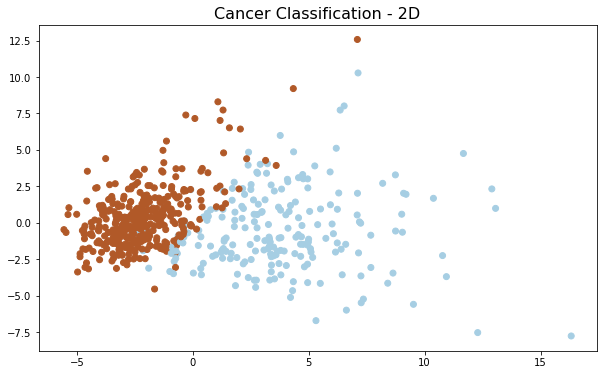

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Cancer Classification - 2D', fontsize=16)
plt.scatter(pca_x[:,0], pca_x[:,1], c=y, cmap='Paired')
plt.show()

**Applying Classifier on 2D PCA-ed data**

In [10]:
# split data
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, random_state=1)
# make classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=4)
classifier.fit(x_train, y_train)
print("Accuracy on training set {}".format(classifier.score(x_train, y_train)))
y_pred = classifier.predict(x_test)
print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 0.9694835680751174
Accuracy on test set 0.9370629370629371


**Variance by PCA - 2D**

In [11]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

**PCA - Principal Component Analysis**
Conversion into 3D

In [12]:
x, y = load_breast_cancer(return_X_y = True)
# Normalize the data
sc = StandardScaler()
x_normalized = sc.fit_transform(x)
# Apply PCA on the data
pca3d = PCA(n_components = 3)
pca3d.fit(x_normalized)
pca_x_3d = pca3d.transform(x_normalized)
pca_x_3d.shape

(569, 3)

**Variance by PCA - 3D**

In [13]:
pca3d.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

**Plot 3D graph**

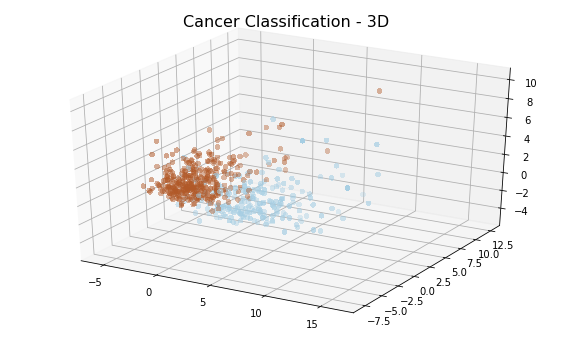

In [14]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np

fig_3d = plt.figure(figsize=(10,6))
ax = fig_3d.add_subplot(111, projection='3d')
x_points = pca_x_3d[:,0]
y_points = pca_x_3d[:,1]
z_points = pca_x_3d[:,2]

#z_points = np.reshape(z_points, (284,2))
#z_points = np.reshape(z_points, (569,2))

plt.title('Cancer Classification - 3D', fontsize=16)
#plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired')
#ax.plot_wireframe(x_points, y_points, z_points)
surf = ax.scatter3D(x_points, y_points, z_points, linewidth=0, antialiased=False, c=y, cmap='Paired')
plt.show()

